In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt

#Imports to visualize data on a map
import math
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from geopandas.tools import geocode

# Function for displaying the map
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='700px')

# Data
We use three datasets: books, users and ratings.
<br>Book-Crossing Datasets are provided by Cai-Nicolas Ziegler, DBIS Freiburg

In [3]:
books = pd.read_csv("BX-Books.csv", sep=';', error_bad_lines=False, encoding="latin-1", warn_bad_lines=True, low_memory=False)
users = pd.read_csv("BX-Users.csv", sep=';', error_bad_lines=False, encoding="latin-1", warn_bad_lines=True, low_memory=False)
ratings = pd.read_csv("BX-Book-Ratings.csv", sep=';', error_bad_lines=False, encoding="latin-1", warn_bad_lines=True, low_memory=False)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\nSkipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\nSkipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\nSkipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


# Books dataset

In [4]:
print("Shape and columns of the books dataset: \n",books.shape,"\n", books.columns)

Shape and columns of the books dataset: 
 (271360, 8) 
 Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Let's see how many nans are in the books dataset  

In [6]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Having a look at the only row without author:

In [7]:
books.iloc[books[books["Book-Author"].isnull()].index,:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


The ISBN of this books has a nan author when searching in Internet, so we will leave this entry as is.
<br> Now let's a look at the rows with nan publishers:

In [8]:
books.iloc[books[books["Publisher"].isnull()].index,:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


Publisher information could be found for the "Tyrant Moon" but for "Finders Keepers" the pubishers for that edition is na on the Internet. 
<br>Let's include the publisher data of "Tyrant Moon".

In [9]:
books.at[128890,"Publisher"]="NovelBooks"
print(books.iloc[128890,:])

ISBN                                                          193169656X
Book-Title                                                   Tyrant Moon
Book-Author                                              Elaine Corvidae
Year-Of-Publication                                                 2002
Publisher                                                     NovelBooks
Image-URL-S            http://images.amazon.com/images/P/193169656X.0...
Image-URL-M            http://images.amazon.com/images/P/193169656X.0...
Image-URL-L            http://images.amazon.com/images/P/193169656X.0...
Name: 128890, dtype: object


**Visualization of the books dataset**

**Year of publication distribution:**
<br> First we check if all values are integers for the year of publication.
<br> We found three books where the information is shifted. The author was not separated correctly due to the chars \\" before the separator \;
<br> The three entries with string inputs will be skipped for visualization as it is just 0.001% of the available data.
<br> On the year of publication histogram we can observe that a peak amount of the books in the dataset were published between 1990 and 2000.

In [10]:
books.loc[~books["Year-Of-Publication"].astype(str).str.isdigit()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [11]:
print(list(books["Book-Title"][[209538, 220731, 221678]]))

['DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"', 'Peuple du ciel, suivi de \'Les Bergers\\";Jean-Marie Gustave Le ClÃ?Â©zio"', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"']


In [12]:
print("Percentage of entries with string data in year of publication:",100*(~books["Year-Of-Publication"].astype(str).str.isdigit()).sum()/len(books),"%")

Percentage of entries with string data in year of publication: 0.0011055424528301887 %


In [13]:
books_year = books.loc[books["Year-Of-Publication"].astype(str).str.isdigit()]

In [78]:
books_year.loc[:,"Year-Of-Publication"]=pd.to_numeric(books_year["Year-Of-Publication"],downcast='integer')
type(books_year["Year-Of-Publication"][0])

numpy.int16

Text(0, 0.5, 'Counts')

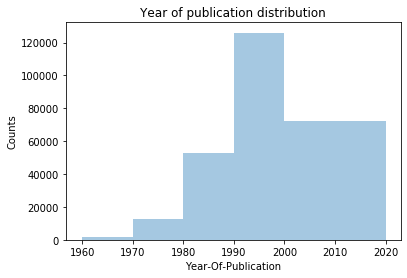

In [15]:
published_plot = sns.distplot(a=books_year["Year-Of-Publication"],hist='true',kde=False,bins=[1960,1970,1980,1990,2000,2020])
published_plot.set_title("Year of publication distribution")
published_plot.set_ylabel("Counts")

**Top 15 most published authors**
<br> Visualization of the top 15 most published authors excluding entries with author "Not Applicable (Na )" (there are 286 books with Na authors in the original dataset).
<br> The most published author is Agatha Christie with 632 books, followed by Shakespeare with 567 books. 

Text(0.5, 0, 'Number of books')

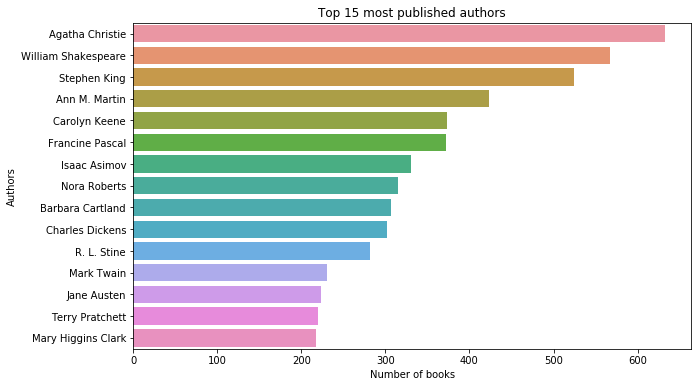

In [16]:
most_authors = (books[books["Book-Author"] != "Not Applicable (Na )"])["Book-Author"].value_counts()[:15]
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Top 15 most published authors")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y= most_authors.index, x=most_authors.values)

# Add label for vertical axis
plt.ylabel("Authors")
plt.xlabel("Number of books")

In [17]:
most_authors

Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
R. L. Stine            282
Mark Twain             231
Jane Austen            223
Terry Pratchett        220
Mary Higgins Clark     218
Name: Book-Author, dtype: int64

# Users Data

In [18]:
print("Shape and columns of the users dataset: \n",users.shape,"\n", users.columns)

Shape and columns of the users dataset: 
 (278858, 3) 
 Index(['User-ID', 'Location', 'Age'], dtype='object')


In [19]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [20]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [21]:
print("Percentage of users without age data: ",format(100*users.Age.isnull().sum()/len(users)),"%")

Percentage of users without age data:  39.71985741847105 %


In [22]:
users_filtered = users.dropna()
users_filtered.shape

(168096, 3)

**Visualization of the users dataset**

**Age distribution of users**
<br> Taking the rows where age data is available, the distribution by age shows that most active users are in the 20 to 40 years old range. 

Text(0, 0.5, 'Counts')

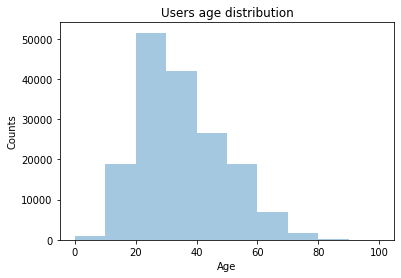

In [23]:
age_plot = sns.distplot(a=users_filtered["Age"],hist='true',bins=[0,10,20,30,40,50,60,70,80,90,100],kde=False,)
age_plot.set_title("Users age distribution")
age_plot.set_ylabel("Counts")

**Geographical distribution of users**

In [24]:
users.Location.value_counts()

london, england, united kingdom              2506
toronto, ontario, canada                     2250
sydney, new south wales, australia           1744
melbourne, victoria, australia               1708
portland, oregon, usa                        1629
                                             ... 
weimar (lahn), idaho, germany                   1
lyon, rhône-alpe, france                        1
belle rose, louisiana, usa                      1
rapallo, italy,                                 1
san vicente del raspeig., alicante, spain       1
Name: Location, Length: 57339, dtype: int64

We only want to include in the map the country where the user lives.
<br> It seems the information in the column Location is separated by commas. 
<br> We first analyse the cases with the most and the less amount of commas in the available locations.

In [25]:
users.Location.iloc[users.Location.str.count(",").idxmax()]

'bangalore, #341,4main,6cross,2phase,r`nagar,m`nagar,b`lore-10, india'

In [26]:
users.Location.iloc[users.Location.str.count(",").idxmin()]

'lawrenceville'

In [27]:
users.Location.str.contains("united kingdom")

0         False
1         False
2         False
3         False
4          True
          ...  
278853    False
278854     True
278855    False
278856    False
278857    False
Name: Location, Length: 278858, dtype: bool

We create a function to split the information in "Location" and keep the words after the last comma which usually corresponds to the country.
<br> This information is then added to a new column named "Country".

In [28]:
def location_split(string):
        return (string.rsplit(",",1))[-1] 
    
print(location_split(users.Location.iloc[users.Location.str.count(",").idxmax()]))  
print(location_split(users.Location.iloc[users.Location.str.count(",").idxmin()]))
print(location_split(users.Location.iloc[278854]))

 india
lawrenceville
 united kingdom


In [29]:
users["Country"] = [location_split(x) for x in users.Location]
users.head()

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


Users dataset has now a shape of 278858 x 4. We will group by country to see if the dimensionality can be reduced.

In [30]:
users.Country = users.Country.apply(lambda x: x.strip('"\'').lstrip().rstrip())

In [31]:
users.iloc[users[users["Country"].str.endswith(' ')].index,:]

,User-ID,Location,Age,Country


In [32]:
users.head()

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


In [33]:
users_grouped = users.Country.value_counts(ascending=False)

In [34]:
print(users_grouped.shape)
print(users_grouped.head)
print(type(users_grouped))

(631,)
<bound method NDFrame.head of usa                 139712
canada               21658
united kingdom       18556
germany              17073
spain                13258
                     ...  
courtenay                1
northern ireland         1
tdzimi                   1
calabria                 1
la suisse                1
Name: Country, Length: 631, dtype: int64>
<class 'pandas.core.series.Series'>


Now we define a geocoder to find the geographical coordinates of the countries.

In [35]:
import certifi
import ssl
import geopy.geocoders
from geopy.geocoders import Nominatim
ctx = ssl.create_default_context(cafile=certifi.where())
geopy.geocoders.options.default_ssl_context = ctx
geolocator = Nominatim(scheme='http', user_agent="my_books")
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1.5, max_retries=3,error_wait_seconds=5.0)
from geopandas.tools import geocode

def my_geocoder(row):
    try:
        point = geocode(row, provider='nominatim').geometry.iloc[0]
        return pd.Series({'Latitude': point.y, 'Longitude': point.x, 'geometry': point})
    except:
        return None
print(my_geocoder("argentina"))

Latitude                            -34.9965
Longitude                           -64.9673
geometry     POINT (-64.9672817 -34.9964963)
dtype: object


Now we obtain the geografical information of each country using the defined geocoder. 

In [36]:
users_grouped= pd.DataFrame({'Country':users_grouped.index, 'Users':users_grouped.values})
users_grouped.head()

,Country,Users
0,usa,139712
1,canada,21658
2,united kingdom,18556
3,germany,17073
4,spain,13258


In [37]:
users_grouped[['Latitude', 'Longitude', 'geometry']] = users_grouped.apply(lambda x: my_geocoder(x.Country), axis=1)
print("{}% of addresses were geocoded!".format(
    (1 - sum(np.isnan(users_grouped["Latitude"])) / len(users_grouped)) * 100))

60.538827258320126% of addresses were geocoded!


Drop users that were not successfully geocoded

In [38]:
users_loc_filtered = users_grouped.loc[~np.isnan(users_grouped["Latitude"])]
users_loc_filtered = gpd.GeoDataFrame(users_loc_filtered, geometry=users_loc_filtered.geometry)
users_loc_filtered.crs = {'init': 'epsg:4326'}

In [39]:
users_loc_filtered.head()

,Country,Users,Latitude,Longitude,geometry
0,usa,139712,39.783730,-100.445882,POINT (-100.44588 39.78373)
1,canada,21658,61.066692,-107.991707,POINT (-107.99171 61.06669)
2,united kingdom,18556,54.702354,-3.276575,POINT (-3.27658 54.70235)
3,germany,17073,51.083420,10.423447,POINT (10.42345 51.08342)
4,spain,13258,39.326234,-4.838065,POINT (-4.83806 39.32623)


In [40]:
users_loc_filtered.head(30).Users.sum()/(users_loc_filtered.Users.sum())

0.982924672281325

Map generation with the information available in users_loc_filtered.
<br>On the map, the red circle shows the country with more than 100k users, the blue circles those with 10k up to 100k users and the green circles those with less than 10k users.

In [41]:
# Create a map
m_1 = folium.Map(location=[54, 15], tiles='cartodbpositron', zoom_start=5)
def color_producer(val):
    if val < 10000:
        return 'forestgreen'
    elif val < 100000:
        return 'blue'
    else:
        return 'red'

# Add a circle map to the base map
for i in range(0,len(users_loc_filtered.head(80))):
    folium.Circle(
        location=[users_loc_filtered.head(80).iloc[i]['Latitude'], users_loc_filtered.head(80).iloc[i]['Longitude']],
        popup=(users_loc_filtered.head(80).iloc[i]['Users']),
        radius=(users_loc_filtered.head(80).iloc[i]['Users']*2000000)/users_loc_filtered.head(80)['Users'].sum(),
        color=color_producer(users_loc_filtered.head(80).iloc[i]['Users']),
        fill_color=color_producer(users_loc_filtered.head(80).iloc[i]['Users']),
        title='Top 80 countries based on number of users').add_to(m_1)
        

# Display the map
embed_map(m_1, 'm_1.html')

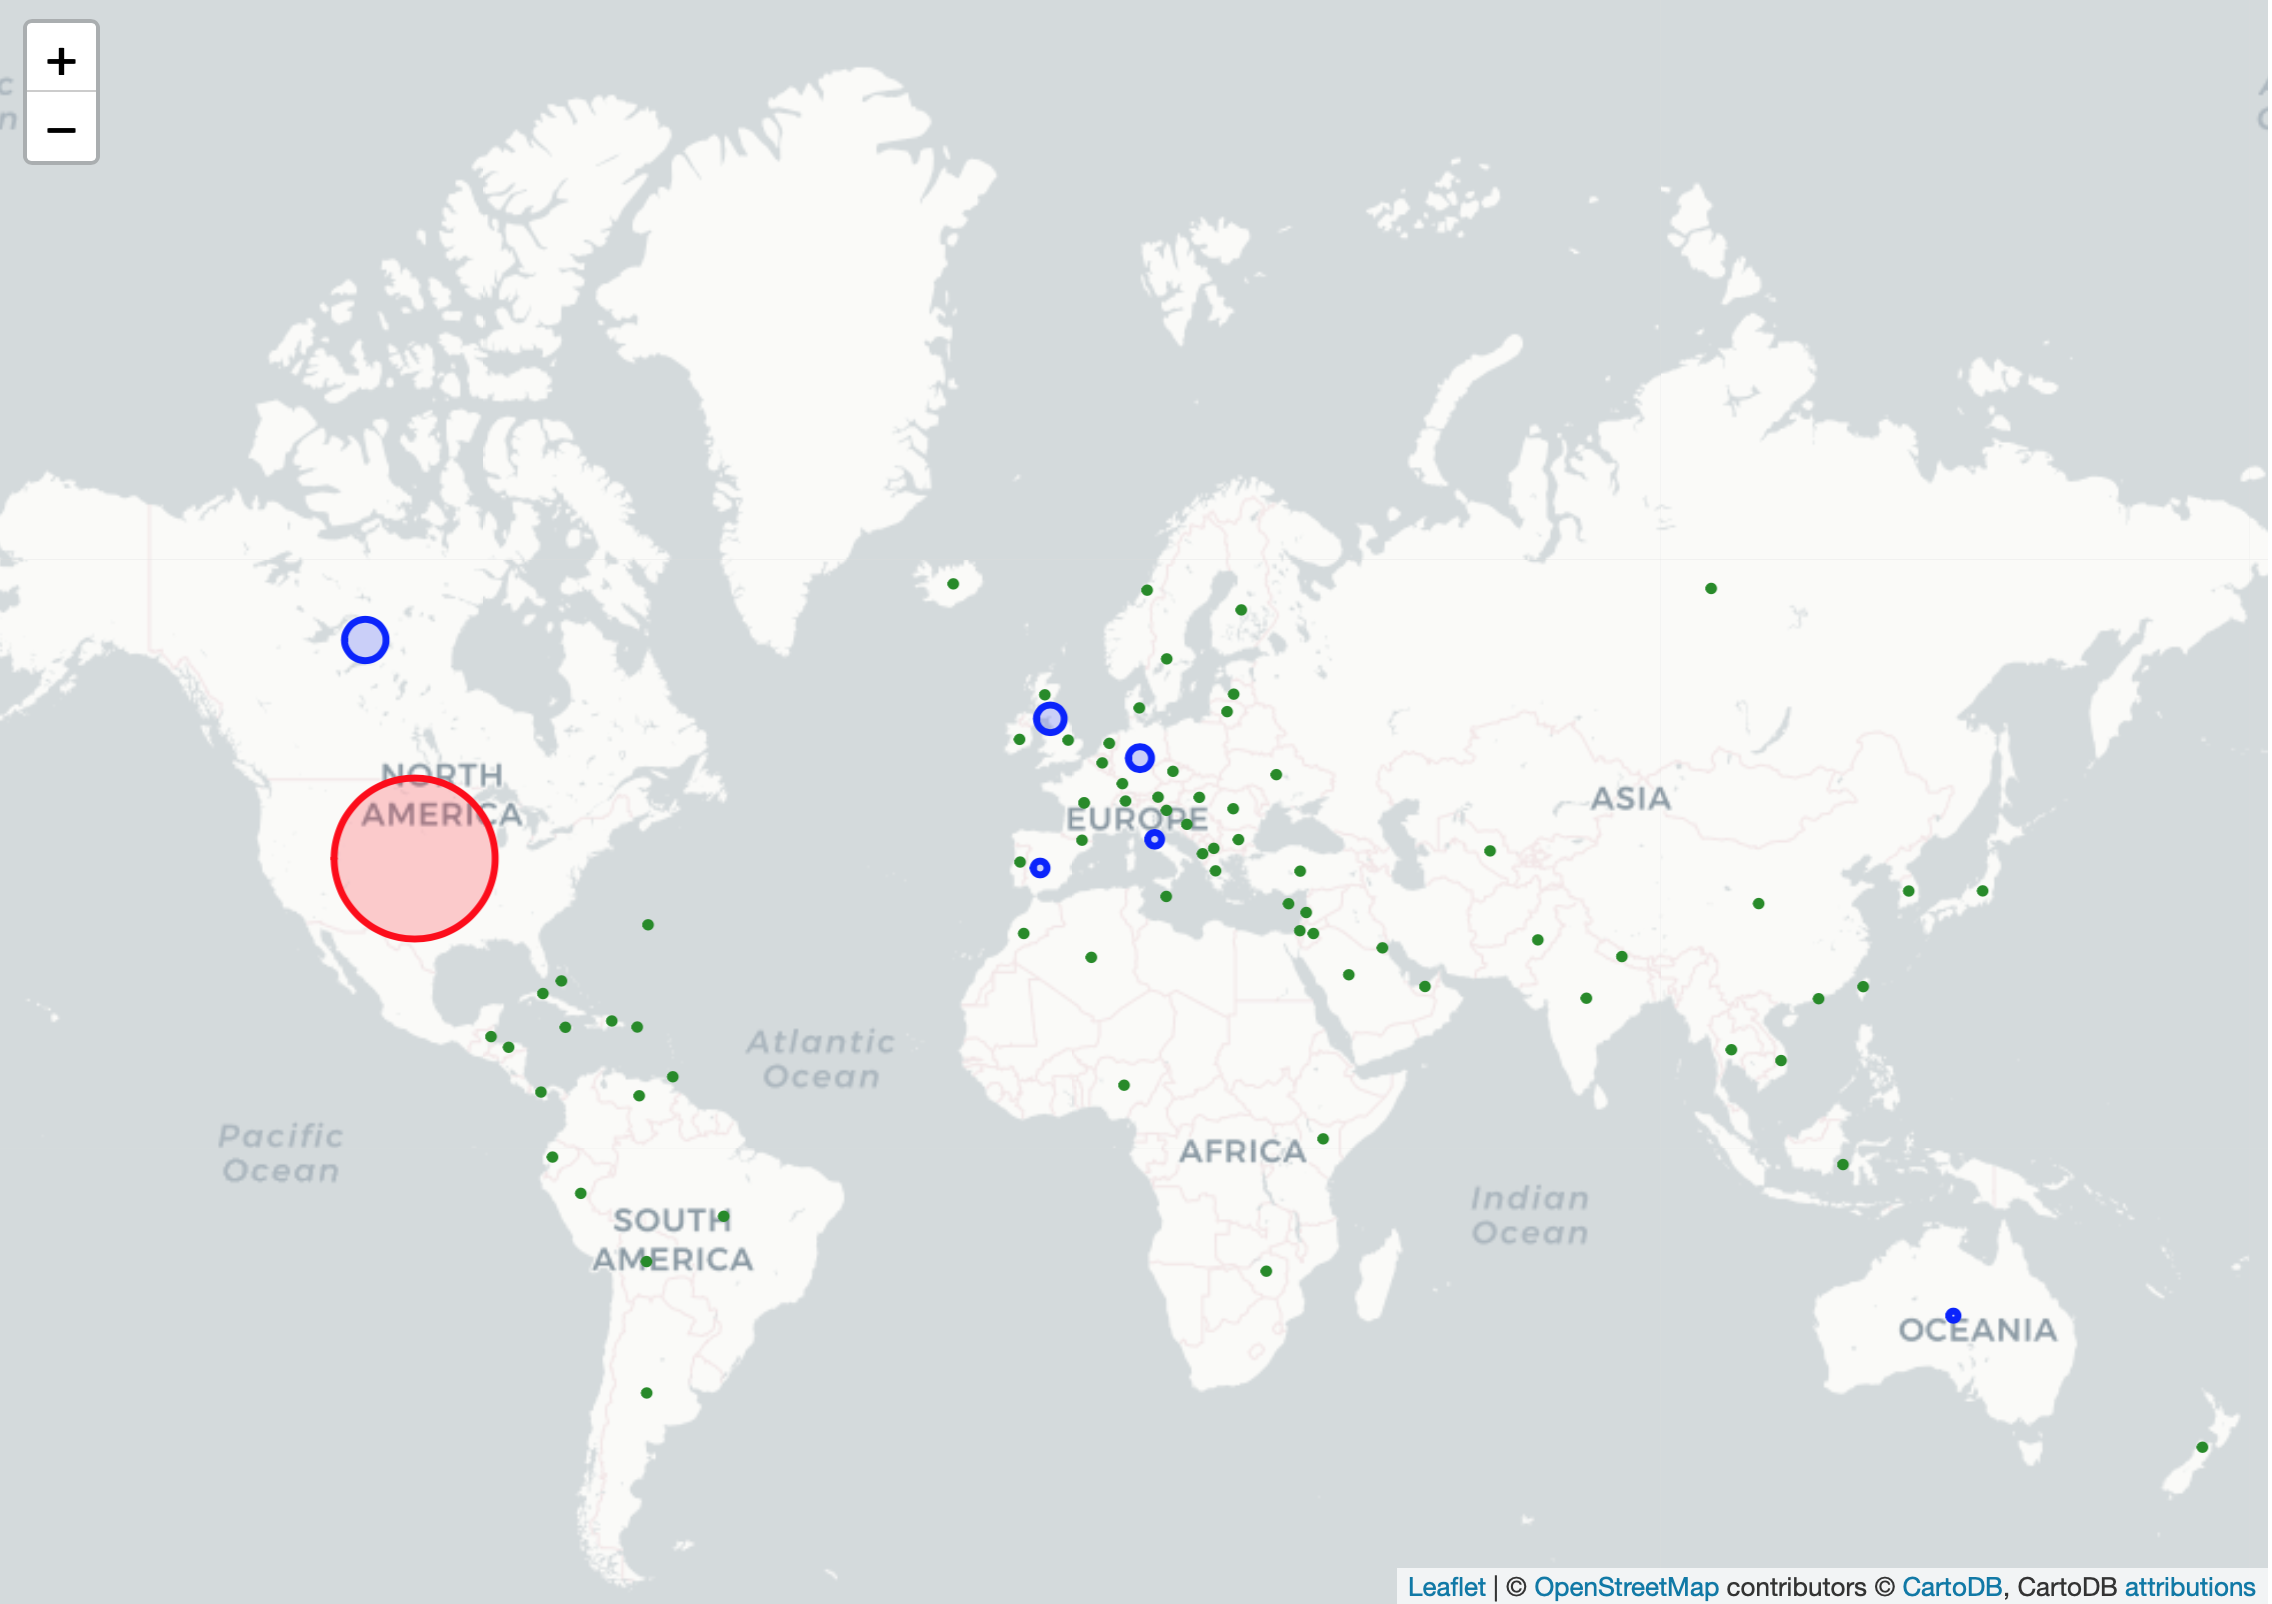

# Ratings dataset

In [42]:
print("Shape and columns of the ratings dataset: \n",ratings.shape,"\n", ratings.columns)

Shape and columns of the ratings dataset: 
 (1149780, 3) 
 Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [44]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


**Rating distribution**

In [45]:
np.isnan(ratings["Book-Rating"]).value_counts()

False    1149780
Name: Book-Rating, dtype: int64

In [49]:
ratings["User-ID"].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
158698        1
17920         1
277135        1
275086        1
187812        1
Name: User-ID, Length: 105283, dtype: int64

We create a new dataframe with the average rating per book, rating count and information about the book. 
<br> From the resulting dataframe, it is clear that the most rated book is not necessary the best rated. Therefore both informations average_rating and rating_count are important to make a book recommendation.

In [50]:
average_rating = pd.DataFrame(ratings.groupby("ISBN")["Book-Rating"].mean())
average_rating["Rating-Count"] = pd.DataFrame(ratings.groupby("ISBN")["Book-Rating"].count())
average_rating = pd.merge(average_rating,books[["ISBN","Book-Title","Book-Author","Year-Of-Publication","Publisher"]],on="ISBN")
average_rating = average_rating.rename(columns={"Book-Rating":"Average-Rating"},errors="raise")

In [51]:
average_rating.sort_values("Rating-Count",ascending=False).head(10)

,ISBN,Average-Rating,Rating-Count,Book-Title,Book-Author,Year-Of-Publication,Publisher
215952,0971880107,1.019584,2502,Wild Animus,Rich Shapero,2004,Too Far
38570,0316666343,4.468726,1295,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
70798,0385504209,4.652322,883,The Da Vinci Code,Dan Brown,2003,Doubleday
7344,0060928336,3.448087,732,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
32370,0312195516,4.334716,723,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
87397,044023722X,3.187017,647,A Painted House,John Grisham,2001,Dell Publishing Company
21342,0142001740,4.219512,615,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
145042,067976402X,3.255700,614,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA
133142,0671027360,3.718430,586,Angels &amp; Demons,Dan Brown,2001,Pocket Star
93847,0446672211,4.105983,585,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books


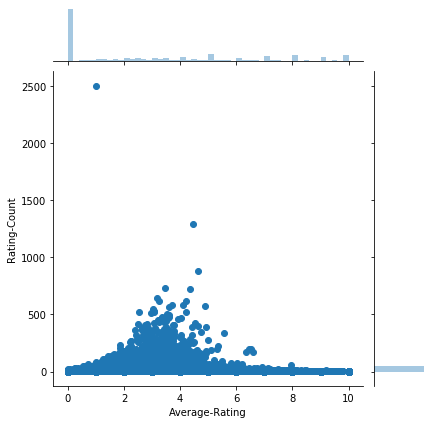

In [51]:
# "Relationship between the rating and the rating count of books"
sns.jointplot(x='Average-Rating', y='Rating-Count', data=average_rating)

In [56]:
average_rating["Rating-Count"].describe()

count    270151.000000
mean          3.816888
std          13.811690
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        2502.000000
Name: Rating-Count, dtype: float64

In [69]:
ratings["User-ID"].value_counts().describe()

count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: User-ID, dtype: float64

To ensure statistical significance, users with less than 300 ratings, and books with less than 50 ratings are excluded.

In [70]:
counts_per_user = ratings["User-ID"].value_counts()
# We'll consider ratings comming from users with minimum 300 ratings
ratings = ratings[ratings["User-ID"].isin(counts_per_user[counts_per_user >= 300].index)]
# We'll consider books with at least 50 ratings
counts_per_book = ratings['Book-Rating'].value_counts()
ratings = ratings[ratings['Book-Rating'].isin(counts_per_book[counts_per_book >= 50].index)]
ratings.head()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [71]:
ratings_pivot = ratings.pivot(index='User-ID', columns='ISBN')["Book-Rating"]
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(561, 187297)


ISBN,0375404120,9022906116,*0515128325,+0451197399,0 00 612183 7,0 00 614494 2,0 7336 1053 6,0 907 062 008,0*708880258,0.330241664,...,THEFLYINGACE,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
User-ID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
def recommender_correlation(isbn):
    book_ratings = ratings_pivot[isbn].dropna()
    similar_books = ratings_pivot.corrwith(book_ratings)
    corr_book = pd.DataFrame({"ISBN":similar_books.index, "pearsonR":similar_books.values})
    corr_book.dropna(inplace=True)
    corr_summary = pd.merge(corr_book,average_rating,on="ISBN")
    print("If you are reading {}, we recommend you the following books:".format((
        average_rating.loc[average_rating["ISBN"] == isbn]["Book-Title"]).values[0]))
    return corr_summary[corr_summary['Rating-Count']>=200].sort_values('pearsonR', ascending=False).head(5)


In [75]:
recommender_correlation("0385504209")

If you are reading The Da Vinci Code, we recommend you the following books:


,ISBN,pearsonR,Average-Rating,Rating-Count,Book-Title,Book-Author,Year-Of-Publication,Publisher
3388,0385504209,1.000000,4.652322,883,The Da Vinci Code,Dan Brown,2003,Doubleday
408,0060987561,0.570940,3.210744,242,I Know This Much Is True,Wally Lamb,1999,Regan Books
4794,044651652X,0.525504,3.100543,368,The Bridges of Madison County,Robert James Waller,1992,Warner Books
1501,0312995423,0.507642,3.419512,205,Digital Fortress : A Thriller,Dan Brown,2003,St. Martin's Press
8581,0767902521,0.484285,4.243902,205,A Walk in the Woods: Rediscovering America on ...,Bill Bryson,1999,Broadway Books
